In [9]:
import FomFunc
import fompy.materials
import fompy.models
import fompy.units
import numpy as np

In [2]:
# входные данные в СИ
z = 10*1e-6
mu = 1400 #  подвижность электронов. С сайта в разделе Mobility and hall effects (я тупо брал верхнюю границу)
Nd = 1e16*1e6
L = 10*1e-6
eps = fompy.materials.Si.eps

a = 100*1e-9
# Vp = e*Nd*a**2/(2*eps*eps0)
# Ip = z*mu*e**2*Nd**2*a**3/(6*eps*eps0*L)

Vp = FomFunc.get_Vp(Nd, a, eps)

Ip = FomFunc.get_Ip(Nd, z, mu, a, eps, L)

Ug = Vp/2

print(Vp,'V')
print(Ip, 'A')

0.07708688655701061 V
0.00575582086292346 A


In [3]:
trans = fompy.models.JFET(fompy.materials.Si, Nd*1e-6, mu, a*1e2, z*1e2, L*1e2) 
print(fompy.units.to_unit(trans.Vp(), 'V')) # напряжение можно сверить с fompy
print(fompy.units.to_unit(trans.Ip(), 'A')) # ток лажа, т.к. мобильность в СГС измеряется хер пойми в чем

0.07732825710520504
3.856775218960888e-09


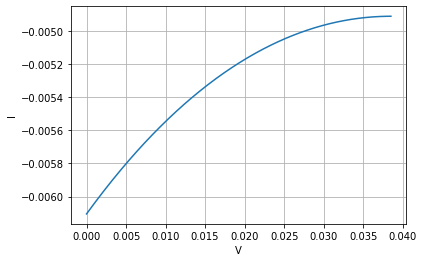

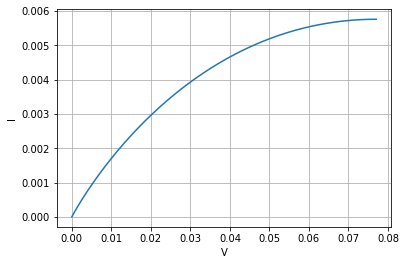

In [4]:
FomFunc.plot_VAC(Vp/2, Vp, Ip)
FomFunc.plot_VAC(0, Vp, Ip)

In [5]:
Ud1, Id_arr1 = FomFunc.get_VAC_data(Vp/2, Vp, Ip)
Ud2, Id_arr2 = FomFunc.get_VAC_data(0, Vp, Ip)

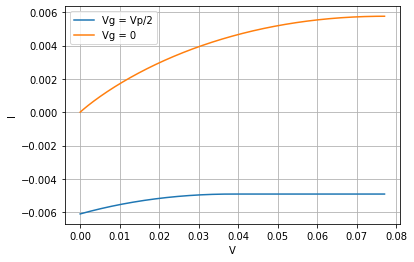

In [6]:
FomFunc.plot_VAC_together(Ud1, Id_arr1, "Vg = Vp/2", Id_arr2, "Vg = 0") # выглядит не оч но вроде верно

In [14]:
# если напрягает можно сместить нижний график
_Id_arr1 = Id_arr1 + np.ones_like(Id_arr1)*np.abs(np.min(Id_arr1))

Vg = 0, I max =  0.00575582086292346
Vg = Vp/2, I max =  0.001192068450718558


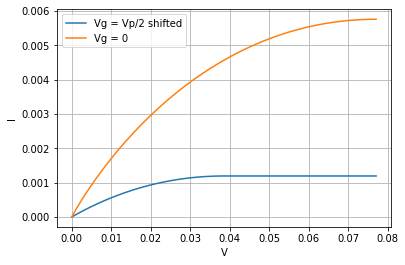

In [16]:
print("Vg = 0, I max = ", np.max(Id_arr2))
print("Vg = Vp/2, I max = ", np.max(_Id_arr1))
FomFunc.plot_VAC_together(Ud1, _Id_arr1, "Vg = Vp/2 shifted", Id_arr2, "Vg = 0")